In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../dados/enunciados.csv')
df.head()

,Id,texto,tópico
0,994,Meu primeiro programa\nEscreva um programa que...,sequencial
1,996,Impressão de caracteres na tela\nEscreva um pr...,sequencial
2,1326,Adição\nSosígenes e Jocasta foram a um restaur...,operações
3,1326,Adição\nSosígenes e Jocasta foram a um restaur...,sequencial
4,1327,Subtração\nHeráclito e Fredegunda foram a um r...,operações


# Quantidade de questões por tópico

In [2]:
df['tópico'].value_counts()

operações               95
vetores                 70
condicional             69
matemática              56
iterações               54
strings                 44
numpy                   41
sequencial              39
TP2                     32
condicional aninhado    32
matrizes                32
TP6                     30
contagem                28
TP5                     27
while                   26
variáveis               24
TP4                     22
TP7                     20
TP1                     20
repetição               19
TP3                     19
sequências              18
lab5                    12
ipc3                    11
encadeada                9
desafios 5               8
for                      5
aritmética               4
datas                    4
string                   3
                        ..
séries                   2
geometria                2
desafios 7               2
lab07                    2
ones()                   1
sistemas lineares        1
s

In [3]:
y=df['tópico']
y=list(set(y))
X=[]
for topico in y:
    a=df.loc[(df["tópico"]==topico)]
    X+=[a['texto']]

In [4]:
import spacy
nlp = spacy.load('pt')

In [5]:
def vocab_top(X):
    geral=[]
    for elemento in X:
        doc=nlp(elemento)
        aux=[]
        for tokens in doc:
            if(len(tokens.text)>1 and tokens.text.isalpha()):
                if not(nlp.vocab[tokens.text].is_stop):
                    aux+=[tokens.lemma_.lower()]
        geral+=[aux]
    return geral

def bag_words(geral):    
    bag_of_words=[]
    lista=[]
    for cada in geral:
        lista+=cada
    aux2=[]
    for cada in lista:
        aux=[]
        if(cada not in aux2):
            if(cada in lista[1:]):
                cont=0;
                for cada2 in lista:
                    if(cada==cada2):
                        cont+=1;
                aux2+=[cada]
                aux+=[cada,cont]

            else:
                aux+=[cada,1]
            bag_of_words+=[aux]
    return bag_of_words

In [6]:
lista=[]
for cada in X:
    geral=vocab_top(cada)
    a=bag_words(geral)
    a.sort(key=lambda x: x[1],reverse=True)
    lista+=[a]

In [7]:
labels=[]
valor=[]
for lista_menor in lista:
    labels_aux=[]
    valor_aux=[]
    for elemento in lista_menor[:20]:
        labels_aux+=[elemento[0]]
        valor_aux+=[elemento[1]]
    labels+=[labels_aux]
    valor+=[np.asarray(valor_aux)]
palavras=labels[-2]

In [8]:
def imprime_padrao(labels,stats1,y):
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats1=np.concatenate((stats1,[stats1[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, stats1, 'o-', linewidth=2)
    ax.fill(angles, stats1, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(y)
    ax.grid(True)

In [9]:
y[20]

'trigonometria'

# Gráfico das frequências das palavras, onde foi criado um bag of words para cada tópico, Foi exibido apenas as 20 palavras com as maiores frequências, abaixo segue apenas alguns tópicos

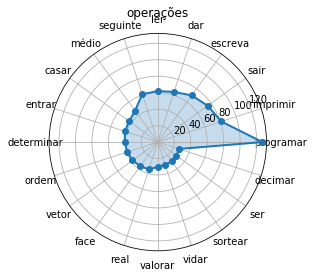

In [10]:
imprime_padrao(labels[8],valor[8],y[8])

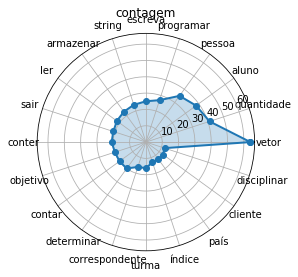

In [11]:
imprime_padrao(labels[-7],valor[-7],y[-7])

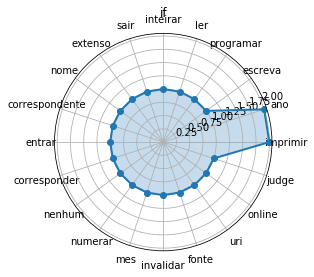

In [12]:
imprime_padrao(labels[35],valor[35],y[35])

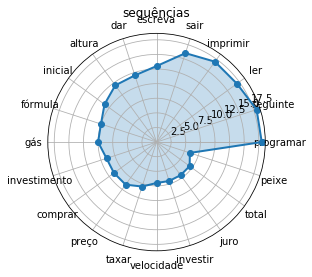

In [13]:
imprime_padrao(labels[-3],valor[-3],y[-3])

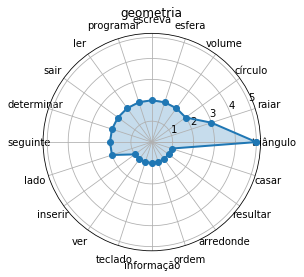

In [14]:
imprime_padrao(labels[10],valor[10],y[10])

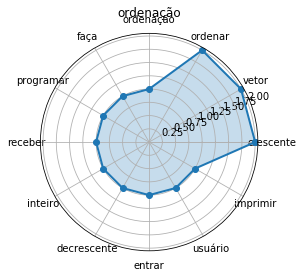

In [15]:
imprime_padrao(labels[0],valor[0],y[0])

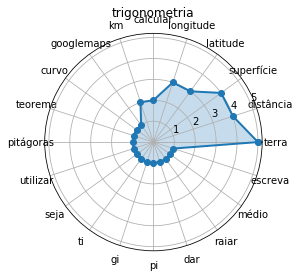

In [16]:
imprime_padrao(labels[20],valor[20],y[20])

In [17]:
df = pd.read_csv('../dados/enunciados.csv')
df.head()

,Id,texto,tópico
0,994,Meu primeiro programa\nEscreva um programa que...,sequencial
1,996,Impressão de caracteres na tela\nEscreva um pr...,sequencial
2,1326,Adição\nSosígenes e Jocasta foram a um restaur...,operações
3,1326,Adição\nSosígenes e Jocasta foram a um restaur...,sequencial
4,1327,Subtração\nHeráclito e Fredegunda foram a um r...,operações


In [18]:
Id=df['Id'].values
Texto=df['texto'].values
topico=df['tópico'].values

In [19]:
def operacao(texto):
    if(texto=='vetores'):
        return [1]
    return [0]
def extracao_atributos(texto,palavras):
    doc=nlp(texto)
    aux=[]
    for tokens in doc:
        if(len(tokens.text)>1 and tokens.text.isalpha()):
            if not(nlp.vocab[tokens.text].is_stop):
                aux+=[tokens.lemma_.lower()]
    lista=[]
    for cada in palavras:
        lista+=[aux.count(cada)]
    return lista

In [20]:
lista=[['Id']+palavras+['label']]
contador=0
while(contador<len(Id)):
    lista+=[[Id[contador]]+extracao_atributos(Texto[contador],palavras)+operacao(topico[contador])]
    contador+=1

In [21]:
lista[0]

['Id',
 'armstrong',
 'dígito',
 'igual',
 'somar',
 'potência',
 'exemplos',
 'escreva',
 'programar',
 'usuário',
 'digitar',
 'positivo',
 'imprimir',
 'entrar',
 'nao',
 'label']

In [22]:
import pandas
direc = pandas.DataFrame(lista)
direc.to_csv('/home/samuel/Documentos/pibic/2019-2020/dados/enunciados_numericos.csv', header=None, index=None)

# Nova tabela, com apenas um tópico(de vetores), a predição é binária, se é do tópico de vetor ou não

In [23]:
df = pd.read_csv('../dados/enunciados_numericos.csv')
df.head()

,Id,armstrong,dígito,igual,somar,potência,exemplos,escreva,programar,usuário,digitar,positivo,imprimir,entrar,nao,label
0,994,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0
1,996,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,1326,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3,1326,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,1327,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [24]:
def normalizacao(df):
    from sklearn import preprocessing
    np_scaled = preprocessing.scale(df)
    df_normalized = pd.DataFrame(np_scaled, columns = df.columns)
    return df_normalized
def subamostragem_balanceamento(df):
    g = df.groupby('label')
    df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
    return df

In [25]:
colunas = ['Id']
df= df.drop(labels = colunas, axis=1)
df.loc[:, df.columns != 'label'] = normalizacao(df.loc[:, df.columns != 'label'])
df.head()

,armstrong,dígito,igual,somar,potência,exemplos,escreva,programar,usuário,digitar,positivo,imprimir,entrar,nao,label
0,-0.046625,-0.11684,-0.332339,-0.210567,-0.046625,-0.109885,0.523725,1.209806,-0.357847,-0.245994,-0.193476,0.415018,-0.618785,-0.201574,0
1,-0.046625,-0.11684,-0.332339,-0.210567,-0.046625,-0.109885,0.523725,-0.566374,-0.357847,-0.245994,-0.193476,0.415018,-0.618785,-0.201574,0
2,-0.046625,-0.11684,-0.332339,-0.210567,-0.046625,-0.109885,0.523725,-0.566374,-0.357847,-0.245994,-0.193476,0.415018,-0.618785,-0.201574,0
3,-0.046625,-0.11684,-0.332339,-0.210567,-0.046625,-0.109885,0.523725,-0.566374,-0.357847,-0.245994,-0.193476,0.415018,-0.618785,-0.201574,0
4,-0.046625,-0.11684,-0.332339,-0.210567,-0.046625,-0.109885,0.523725,-0.566374,-0.357847,-0.245994,-0.193476,0.415018,-0.618785,-0.201574,0


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV
from numpy import loadtxt
from sklearn.metrics import accuracy_score

In [27]:
g = df.groupby('label')
g.size()

label
0    852
1     70
dtype: int64

# Balanceamento

In [28]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [29]:
X, y = df.drop('label', axis=1).values, df['label'].values

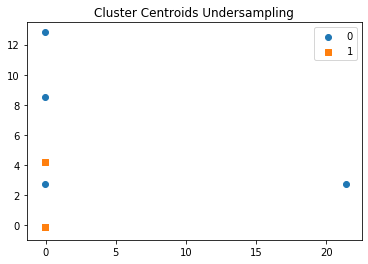

In [30]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids Undersampling')

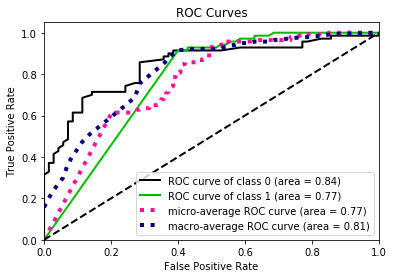

In [31]:
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
nb = GaussianNB()
nb.fit(X_cc, y_cc)
probas = nb.predict_proba(X_cc)
skplt.metrics.plot_roc(y_true=y_cc, y_probas=probas)
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

#pipeline = make_pipeline(
#            RFE(estimator=ExtraTreesClassifier(criterion="gini", n_estimators=100), step=0.5),
#            RandomForestClassifier(max_features=0.9500000000000001, min_samples_leaf=20, n_estimators=500)
#        )

pipeline = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.45, min_samples_leaf=7, min_samples_split=19)

In [33]:
cv_score = cross_val_score(pipeline, X_cc, y_cc, scoring='accuracy', cv=10)

/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-pa

# Resultados

In [34]:
print('Acc.: %.2f [+/-%.2f]' % (cv_score.mean(), cv_score.std()))

Acc.: 0.71 [+/-0.17]


In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf=RandomForestClassifier(n_estimators=100)
y_pred=cross_val_predict(pipeline,X_cc,y_cc,cv=10)
print(confusion_matrix(y_cc,y_pred))

[[48 22]
 [20 50]]


/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/anaconda3/lib/python3.7/site-pa

In [36]:
print(classification_report(y_cc,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        70
           1       0.69      0.71      0.70        70

    accuracy                           0.70       140
   macro avg       0.70      0.70      0.70       140
weighted avg       0.70      0.70      0.70       140

